In [7]:
import os
os.environ['PIXELTABLE_PGDATA'] = '/scr/dagutman/devel/messageAnalytics/.pxtData'
import pixeltable as pxt

In [9]:
t = pxt.get_table('hani89_asr_data.transcribe_compare')
t.show(5)

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/scr/dagutman/devel/messageAnalytics/.pxtData


id,audio,filename,transcription,split,filePath,whisper_tinyEn_transcription,whisper_smallEn_transcription,whisper_mediumEn_transcription,whisper_large_transcription,whisper_baseEn_transcription,whisper_turbo_transcription
None,,sample_50.wav,I hit my head at the basketball game. Could I have a concussion?,train,train_extracted_audio/sample_50.wav,"{""text"": "" I hit my head at the basketball game. Could I have a concussion?"", ""language"": ""en"", ""segments"": [{""id"": 0, ""end"": 4., ""seek"": 0, ""text"": "" I hit my head at the basketball game."", ""start"": 0., ""tokens"": [50363, 314, 2277, 616, 1182, 379, 262, 9669, 983, 13, 50563], ""avg_logprob"": -0.418, ""temperature"": 0., ""no_speech_prob"": 0.242, ""compression_ratio"": 0.928}, {""id"": 1, ""end"": 7., ""seek"": 0, ""text"": "" Could I have a concussion?"", ""start"": 4., ""tokens"": [50563, 10347, 314, 423, 257, 27502, 30, 50713], ""avg_logprob"": -0.418, ""temperature"": 0., ""no_speech_prob"": 0.242, ""compression_ratio"": 0.928}]}","{""text"": "" I hit my head at the basketball game. Could I have a concussion?"", ""language"": ""en"", ""segments"": [{""id"": 0, ""end"": 7., ""seek"": 0, ""text"": "" I hit my head at the basketball game. Could I have a concussion?"", ""start"": 0., ""tokens"": [50363, 314, 2277, 616, 1182, 379, ..., 314, 423, 257, 27502, 30, 50713], ""avg_logprob"": -0.291, ""temperature"": 0., ""no_speech_prob"": 0.012, ""compression_ratio"": 0.928}]}","{""text"": "" I hit my head at the basketball game. Could I have a concussion?"", ""language"": ""en"", ""segments"": [{""id"": 0, ""end"": 6., ""seek"": 0, ""text"": "" I hit my head at the basketball game. Could I have a concussion?"", ""start"": 0., ""tokens"": [50363, 314, 2277, 616, 1182, 379, ..., 314, 423, 257, 27502, 30, 50663], ""avg_logprob"": -0.317, ""temperature"": 0., ""no_speech_prob"": 0.019, ""compression_ratio"": 0.928}]}","{""text"": "" I hit my head at the basketball game. Could I have a concussion?"", ""language"": ""en"", ""segments"": [{""id"": 0, ""end"": 5.24, ""seek"": 0, ""text"": "" I hit my head at the basketball game. Could I have a concussion?"", ""start"": 0., ""tokens"": [50365, 286, 2045, 452, 1378, 412, ..., 362, 257, 416, 25049, 30, 50627], ""avg_logprob"": -0.186, ""temperature"": 0., ""no_speech_prob"": 0.036, ""compression_ratio"": 0.928}]}","{""text"": "" I hit my head at the basketball game. Could I have a conclusion?"", ""language"": ""en"", ""segments"": [{""id"": 0, ""end"": 4., ""seek"": 0, ""text"": "" I hit my head at the basketball game."", ""start"": 0., ""tokens"": [50363, 314, 2277, 616, 1182, 379, 262, 9669, 983, 13, 50563], ""avg_logprob"": -0.395, ""temperature"": 0., ""no_speech_prob"": 0.046, ""compression_ratio"": 0.941}, {""id"": 1, ""end"": 7., ""seek"": 0, ""text"": "" Could I have a conclusion?"", ""start"": 4., ""tokens"": [50563, 10347, 314, 423, 257, 7664, 30, 50713], ""avg_logprob"": -0.395, ""temperature"": 0., ""no_speech_prob"": 0.046, ""compression_ratio"": 0.941}]}","{""text"": "" I hit my head at the basketball game. Could I have a concussion?"", ""language"": ""en"", ""segments"": [{""id"": 0, ""end"": 7., ""seek"": 0, ""text"": "" I hit my head at the basketball game. Could I have a concussion?"", ""start"": 0., ""tokens"": [50365, 286, 2045, 452, 1378, 412, ..., 362, 257, 416, 25049, 30, 50715], ""avg_logprob"": -0.217, ""temperature"": 0., ""no_speech_prob"": 4.095e-12, ""compression_ratio"": 0.928}]}"
None,,sample_51.wav,I have a sharp pain in my neck,train,train_extracted_audio/sample_51.wav,"{""text"": "" I have a sharp pain in my neck."", ""language"": ""en"", ""segments"": [{""id"": 0, ""end"": 2., ""seek"": 0, ""text"": "" I have a sharp pain in my neck."", ""start"": 0., ""tokens"": [50363, 314, 423, 257, 7786, 2356, 287, 616, 7393, 13, 50463], ""avg_logprob"": -0.372, ""temperature"": 0., ""no_speech_prob"": 0.021, ""compression_ratio"": 0.838}]}","{""text"": "" I have a sharp pain in my neck."", ""language""

In [56]:
tx_df = t.select(t.whisper_tinyEn_transcription.text, t.whisper_baseEn_transcription.text, t.whisper_smallEn_transcription.text,
t.whisper_mediumEn_transcription.text, t.whisper_turbo_transcription.text, t.whisper_large_transcription.text, t.transcription, t.filename    ).show(500).to_pandas()

tx_df.head()

,whispertinyEntranscription_text,whisperbaseEntranscription_text,whispersmallEntranscription_text,whispermediumEntranscription_text,whisperturbotranscription_text,whisperlargetranscription_text,transcription,filename
0,I hit my head at the basketball game. Could I...,I hit my head at the basketball game. Could I...,I hit my head at the basketball game. Could I...,I hit my head at the basketball game. Could I...,I hit my head at the basketball game. Could I...,I hit my head at the basketball game. Could I...,I hit my head at the basketball game. Could I...,sample_50.wav
1,I have a sharp pain in my neck.,I have a sharp pain in my neck.,I have a sharp pain in my neck.,I have a sharp pain in my neck.,I have a sharp pain in my neck.,I have a sharp pain in my neck.,I have a sharp pain in my neck,sample_51.wav
2,My Samgot attached to several weeks ago and t...,My sun gold attached to several weeks ago and...,My sun board attached to several weeks ago an...,My sun got attacked several weeks ago and the...,My son goat attacked several weeks ago and th...,माई संगोट अटाइट तु सर्वल विक्स एगो आण दा स्कि...,My son got a tattoo several weeks ago and the ...,sample_52.wav
3,I have a dull ink in my head.,I have a dull ache in my head.,I have adult 8 in my head.,I have a dull ache in my head.,I have a dull ache in my head.,I have a dull ache in my head.,I have a dull ache in my head,sample_53.wav
4,I feel cold chills even though my clothes are...,I feel cold chills even though my clothes are...,I feel cold chills even though my clothes are...,I feel cold chills even though my clothes are...,I feel cold chills even though my clothes are...,I feel cold chills even though my clothes are...,I feel cold and chills even though my clothes ...,sample_54.wav


In [57]:
import pandas as pd
import numpy as np
import jiwer

def calculate_wer_detailed(hypothesis, reference):
    if pd.isna(hypothesis) or pd.isna(reference) or hypothesis == '' or reference == '':
        return {'wer': np.nan, 'substitutions': np.nan, 'deletions': np.nan, 'insertions': np.nan}
    
    try:
        transforms = jiwer.Compose([
            jiwer.ToLowerCase(),
            jiwer.RemovePunctuation(),
            jiwer.RemoveMultipleSpaces(),
            jiwer.RemoveWhiteSpace(replace_by_space=True),
            jiwer.ReduceToListOfListOfWords()
        ])
        
        measures = jiwer.compute_measures(
            reference,
            hypothesis,
            truth_transform=transforms,
            hypothesis_transform=transforms
        )
        
        return {
            'wer': measures['wer'],
            'substitutions': measures['substitutions'],
            'deletions': measures['deletions'],
            'insertions': measures['insertions']
        }
    except ValueError as e:
        print(f"Error processing:\nReference: {reference}\nHypothesis: {hypothesis}\nError: {e}")
        return {'wer': np.nan, 'substitutions': np.nan, 'deletions': np.nan, 'insertions': np.nan}


In [58]:
import pandas as pd
import numpy as np
import jiwer

# Reuse your transform pipeline
transforms = jiwer.Compose([
    jiwer.ToLowerCase(),
    jiwer.RemovePunctuation(),
    jiwer.RemoveMultipleSpaces(),
    jiwer.RemoveWhiteSpace(replace_by_space=True),
    jiwer.ReduceToListOfListOfWords()
])

def calculate_wer(hypothesis, reference):
    if pd.isna(hypothesis) or pd.isna(reference) or hypothesis == '' or reference == '':
        return np.nan
    try:
        return jiwer.wer(
            reference,
            hypothesis,
            truth_transform=transforms,
            hypothesis_transform=transforms
        )
    except ValueError as e:
        print(f"Error processing:\nReference: {reference}\nHypothesis: {hypothesis}\nError: {e}")
        return np.nan

# Define the model output columns
model_cols = [
    'whispertinyEntranscription_text',
    'whispersmallEntranscription_text',
    'whispermediumEntranscription_text',
    'whisperlargetranscription_text',
    'whisperturbotranscription_text',
   
    
]

# Compute WERs
for col in model_cols:
    wer_col = col.replace('transcription_text', 'wer')
    tx_df[wer_col] = tx_df.apply(lambda row: calculate_wer(row[col], row['transcription']), axis=1)


## make the filename the id column
tx_df['id'] = tx_df['filename']


In [59]:
tx_df.count()

whispertinyEntranscription_text      500
whisperbaseEntranscription_text      500
whispersmallEntranscription_text     500
whispermediumEntranscription_text    500
whisperturbotranscription_text       500
whisperlargetranscription_text       500
transcription                        500
filename                             500
whispertinyEnwer                     498
whispersmallEnwer                    500
whispermediumEnwer                   498
whisperlargewer                      499
whisperturbower                      500
id                                   500
dtype: int64

In [60]:
# Summary WER statistics
wer_summary = tx_df[[col.replace('transcription_text', 'wer') for col in model_cols]].describe()
print(wer_summary)


       whispertinyEnwer  whispersmallEnwer  whispermediumEnwer  \
count        498.000000         500.000000          498.000000   
mean           0.185823           0.106710            0.086000   
std            0.244743           0.194362            0.163828   
min            0.000000           0.000000            0.000000   
25%            0.000000           0.000000            0.000000   
50%            0.100000           0.000000            0.000000   
75%            0.285714           0.142857            0.125000   
max            1.230769           1.125000            1.111111   

       whisperlargewer  whisperturbower  
count       499.000000       500.000000  
mean          0.129563         0.084846  
std           0.286510         0.182848  
min           0.000000         0.000000  
25%           0.000000         0.000000  
50%           0.000000         0.000000  
75%           0.125000         0.112179  
max           1.555556         1.500000  


<Figure size 1000x600 with 0 Axes>

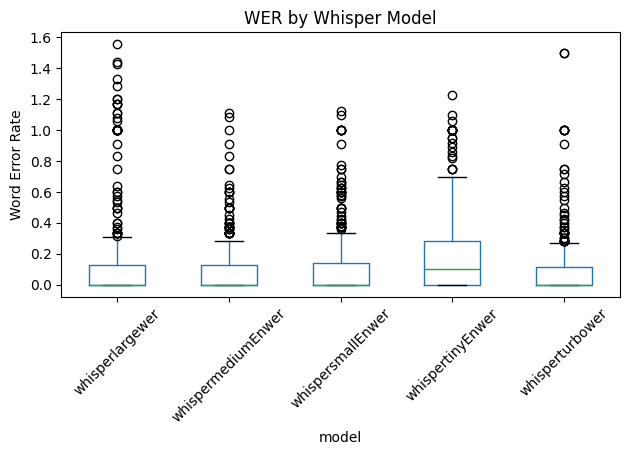

In [61]:
import matplotlib.pyplot as plt

# Melt to long format for boxplot
df_long = tx_df.melt(id_vars='id', value_vars=[col.replace('transcription_text', 'wer') for col in model_cols],
                  var_name='model', value_name='wer')

plt.figure(figsize=(10, 6))
df_long.boxplot(by='model', column='wer', grid=False)
plt.title("WER by Whisper Model")
plt.suptitle("")
plt.ylabel("Word Error Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

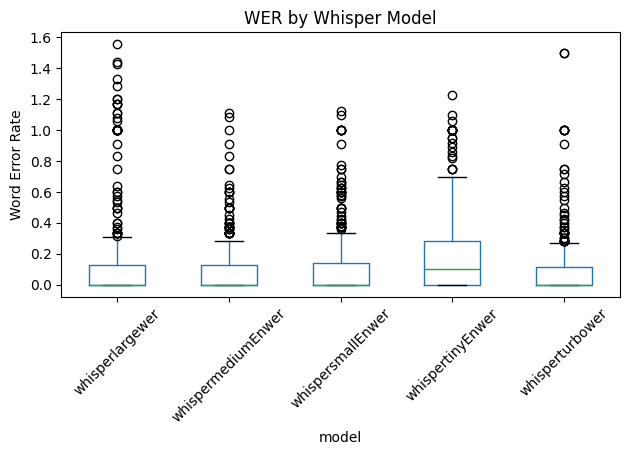

In [62]:
import matplotlib.pyplot as plt

# Melt to long format for boxplot
df_long = tx_df.melt(id_vars='id', value_vars=[col.replace('transcription_text', 'wer') for col in model_cols],
                  var_name='model', value_name='wer')

plt.figure(figsize=(10, 6))
df_long.boxplot(by='model', column='wer', grid=False)
plt.title("WER by Whisper Model")
plt.suptitle("")
plt.ylabel("Word Error Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [63]:
import plotly.express as px
import pandas as pd

df =tx_df

# Optional: ensure the model columns are in a consistent order
model_order = [
    'whispertinyEnwer',
    'whispersmallEnwer',
    'whispermediumEnwer',
    'whisperlargewer',
    'whisperturbower',
 
]

# Melt the DataFrame
df_long = df.melt(id_vars='id', value_vars=model_order,
                  var_name='Model', value_name='WER')

# Clean labels
label_map = {
    'whispertinyEnwer': 'Whisper Tiny',
    'whispersmallEnwer': 'Whisper Small',
    'whispermediumEnwer': 'Whisper Medium',
    'whisperlargewer': 'Whisper Large',
    'whisperturbower': 'Whisper Turbo',
  
}
df_long['Model'] = df_long['Model'].map(label_map)

# Sort models in logical order
df_long['Model'] = pd.Categorical(df_long['Model'],
                                  categories=['Whisper Tiny', 'Whisper Small', 'Whisper Medium', 'Whisper Large', 'Whisper Turbo',],
                                  ordered=True)

# Create Plotly boxplot
fig = px.box(df_long,
             x='Model',
             y='WER',
             title="WER Comparison Across Whisper Models",
             points="all",  # show all points
             color='Model',
             labels={"WER": "Word Error Rate", "Model": "Whisper Model"},
             template="plotly_white")

fig.update_layout(
    title_font_size=20,
    yaxis=dict(range=[0, min(1.2, df_long['WER'].max() + 0.1)]),
    xaxis_title="",
    yaxis_title="Word Error Rate",
    font=dict(size=14),
    showlegend=False
)   
fig.show()


In [64]:
import plotly.express as px
import pandas as pd

df =tx_df

# Optional: ensure the model columns are in a consistent order
model_order = [
    'whispertinyEnwer',
    'whispersmallEnwer',
    'whispermediumEnwer',
    'whisperlargewer',
    'whisperturbower',
 
]

# Melt the DataFrame
df_long = df.melt(id_vars='id', value_vars=model_order,
                  var_name='Model', value_name='WER')

# Clean labels
label_map = {
    'whispertinyEnwer': 'Whisper Tiny',
    'whispersmallEnwer': 'Whisper Small',
    'whispermediumEnwer': 'Whisper Medium',
    'whisperlargewer': 'Whisper Large',
    'whisperturbower': 'Whisper Turbo',
  
}
df_long['Model'] = df_long['Model'].map(label_map)

# Sort models in logical order
df_long['Model'] = pd.Categorical(df_long['Model'],
                                  categories=['Whisper Tiny', 'Whisper Small', 'Whisper Medium', 'Whisper Large', 'Whisper Turbo',],
                                  ordered=True)

# Calculate average WER for each model
avg_wer = df_long.groupby('Model')['WER'].mean().reset_index()
avg_wer['avg_text'] = avg_wer['WER'].apply(lambda x: f'Avg: {x:.3f}')

# Create Plotly boxplot
fig = px.box(df_long,
             x='Model',
             y='WER',
             title="WER Comparison Across Whisper Models",
             points="all",  # show all points
             color='Model',
             labels={"WER": "Word Error Rate", "Model": "Whisper Model"},
             template="plotly_white")

fig.update_layout(
    title_font_size=20,
    yaxis=dict(range=[0, min(1.2, df_long['WER'].max() + 0.1)]),
    xaxis_title="",
    yaxis_title="Word Error Rate",
    font=dict(size=14),
    showlegend=False
)

# Add average WER text annotations
for i, row in avg_wer.iterrows():
    fig.add_annotation(
        x=row['Model'],
        y=row['WER'] + 0.02,  # Position text slightly above the average
        text=row['avg_text'],
        showarrow=False,
        font=dict(size=12, color='red'),
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='red',
        borderwidth=1
    )

fig.show()

/tmp/ipykernel_1282679/1746615711.py:37: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipykernel_1282679/1746615711.py:37: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [70]:
import plotly.express as px
import pandas as pd

df = tx_df

# Optional: ensure the model columns are in a consistent order
model_order = [
    'whispertinyEnwer',
    'whispersmallEnwer',
    'whispermediumEnwer',
    'whisperlargewer',
    'whisperturbower',
 
]

# Melt the DataFrame
df_long = df.melt(id_vars='id', value_vars=model_order,
                  var_name='Model', value_name='WER')

# Clean labels
label_map = {
    'whispertinyEnwer': 'Whisper Tiny',
    'whispersmallEnwer': 'Whisper Small',
    'whispermediumEnwer': 'Whisper Medium',
    'whisperlargewer': 'Whisper Large',
    'whisperturbower': 'Whisper Turbo',
  
}
df_long['Model'] = df_long['Model'].map(label_map)

# Sort models in logical order
df_long['Model'] = pd.Categorical(df_long['Model'],
                                  categories=['Whisper Tiny', 'Whisper Small', 'Whisper Medium', 'Whisper Large', 'Whisper Turbo',],
                                  ordered=True)

# Calculate average WER for each model
avg_wer = df_long.groupby('Model')['WER'].mean().reset_index()
avg_wer['avg_text'] = avg_wer['WER'].apply(lambda x: f'Avg: {x:.3f}')

# Create Plotly violin plot
fig = px.violin(df_long,
                x='Model',
                y='WER',
                title="WER Distribution Across Whisper Models",
                color='Model',
                labels={"WER": "Word Error Rate", "Model": "Whisper Model"},
                template="plotly_white",
                box=False,#True,  # Add box plot inside violin
                points="outliers")  # Show only outlier points

fig.update_layout(
    title_font_size=20,
    yaxis=dict(range=[0, min(1.2, df_long['WER'].max() + 0.1)]),
    xaxis_title="",
    yaxis_title="Word Error Rate",
    font=dict(size=14),
    showlegend=False
)

# Add average WER text annotations
for i, row in avg_wer.iterrows():
    fig.add_annotation(
        x=row['Model'],
        y=row['WER'] + 0.4,  # Position text slightly above the average
        text=row['avg_text'],
        showarrow=False,
        font=dict(size=12, color='red'),
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='red',
        borderwidth=1
    )

fig.show()

/tmp/ipykernel_1282679/4167451106.py:37: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [48]:
import plotly.express as px
import pandas as pd

# Define model columns in logical order
model_order = [
    'whispertinyEnwer',
    'whispersmallEnwer',
    'whispermediumEnwer',
    'whisperlargewer',
    'whisperturbower',
   # 'parakeet06bv2wer'
]

# Label mapping for display
label_map = {
    'whispertinyEnwer': 'Whisper Tiny',
    'whispersmallEnwer': 'Whisper Small',
    'whispermediumEnwer': 'Whisper Medium',
    'whisperlargewer': 'Whisper Large',
    'whisperturbower': 'Whisper Turbo',
   # 'parakeet06bv2wer': 'Parakeet 06bv2'
}

# Prepare the DataFrame
sort_by = 'whisperlargewer'  # Or whichever model you'd like to sort by
heatmap_df = df[['id'] + model_order].copy()
heatmap_df = heatmap_df.sort_values(by=sort_by).reset_index(drop=True)
heatmap_df['id'] = heatmap_df['id'].astype(str)

# Melt into long format
heatmap_long = heatmap_df.melt(id_vars='id', var_name='Model', value_name='WER')
heatmap_long['Model'] = heatmap_long['Model'].map(label_map)

# Create heatmap pivot table
pivot_df = heatmap_long.pivot(index='id', columns='Model', values='WER')

# Plot
fig = px.imshow(
    pivot_df,
    labels=dict(x="Model", y="Message ID", color="WER"),
    color_continuous_scale='Reds',
    aspect='auto',
    title="WER Heatmap by Message and Whisper Model"
)

fig.update_layout(
    yaxis=dict(title='Message ID', automargin=True),
    xaxis=dict(title='Whisper Model'),
    coloraxis_colorbar=dict(title="Word Error Rate"),
    font=dict(size=12),
    title_font_size=18,
    height=800
)

fig.show()
